In [6]:
# pip install gdal;
#install gdal before for the installation of pywapor library
!pip install gdal


In [7]:
#install  pywapor
!pip install pywapor

In [8]:
#select the latitude and longitude for which soil moisture is going to fetched
points = [
    (30.1234, 72.5678),  # (latitude, longitude)

    # Add more points as needed
]

# Define a small bounding box around the point
def get_bounding_box(point, buffer=0.01):
    lat, lon = point
    latlim = [lat - buffer, lat + buffer]
    lonlim = [lon - buffer, lon + buffer]
    return latlim, lonlim

# Example bounding box around the first point
latlim, lonlim = get_bounding_box(points[0])
print("Latitude Limits:", latlim)
print("Longitude Limits:", lonlim)


Latitude Limits: [30.1134, 30.1334]
Longitude Limits: [72.5578, 72.57780000000001]


In [9]:
project_folder = r"/content/sample_data/pyData_high"
timelim = ["2021-07-01", "2021-07-11"]
#if you are not running the above command for the point data then give yours latlim and lonlim for area of interest as given below
# latlim = [28.9, 29.7]
# lonlim = [30.2, 31.2]

#level 3 is for 20m resolution, there you can change the level as you wish
level = "level_3_v3"

import osgeo from gdal to run smothly all the function running behind the main command number 9

In [10]:

from osgeo import gdal
print("Using gdal version", gdal.__version__)

Using gdal version 3.6.4


import pywapor library

In [11]:

import pywapor
print("Using pywapor version:", pywapor.__version__)

Using pywapor version: 3.5.7


install upgraded version of cds api (copernicus api)

In [13]:

!pip install --upgrade cdsapi

In [14]:
import cdsapi

run this command and give passwords of following accounts
1- COPERNICUS_DATA_SPACE account
2- NASA account
3- ECMWF` account
      a- Create an account at https://cds.climate.copernicus.eu.
      b- On your profile page, scroll to the "API key" section.
      c- Accept conditions when running `setup("ECMWF")` for the first time.

In [15]:

ds  = pywapor.pre_et_look.main(project_folder, latlim, lonlim, timelim, sources = level)

--> lonlim: [72.5578, 72.57780000000001]
--> latlim: [30.1134, 30.1334]
--> timelim: ['2021-07-01', '2021-07-11']
> PRE_ET_LOOK
    --> Collecting `ndvi`, `r0` from `LANDSAT.LT05_SR`.
        --> Found 0 scenes.
    --> Collecting `ndvi`, `r0` from `LANDSAT.LE07_SR`.
            > timesize: 2 [2021-07-03T04:40, ..., 2021-07-10T04:46]
    --> Collecting `ndvi`, `r0` from `LANDSAT.LC08_SR`.
            > timesize: 1 [2021-07-02T05:43, ..., 2021-07-02T05:43]
    --> Collecting `ndvi`, `r0` from `LANDSAT.LC09_SR`.
        --> Found 0 scenes.
    --> Collecting `ndvi`, `r0` from `SENTINEL2.S2MSI2A_R20m`.
            > timesize: 4 [2021-06-29T05:46, ..., 2021-07-14T05:46]
    --> Collecting `p` from `CHIRPS.P05`.
            > timesize: 18 [2021-06-28T00:30, ..., 2021-07-15T00:30]
    --> Collecting `z` from `COPERNICUS.GLO30`.
    --> Collecting `t_air`, `t_air_min`, `t_air_max`, `u`, `vp`, `ra` from `ERA5.sis-agrometeorological-indicators`.
            > timesize: 18 [2021-06-28T12:00, ...

it will tell the path of et_look_in.nc file where this file is located there se_root (Relative root zone soil moisture)

In [16]:

fh = ds.encoding["source"]
print(fh)

/content/sample_data/pyData_high/et_look_in.nc


this command will tell all the variables in the et_look_in.nc file

In [17]:
ds

<xarray.Dataset> Size: 12MB
Dimensions:              (time_bins: 11, y: 105, x: 105)
Coordinates:
    spatial_ref          int64 8B ...
  * time_bins            (time_bins) datetime64[ns] 88B 2021-07-01 ... 2021-0...
  * y                    (y) float64 840B 30.13 30.13 30.13 ... 30.11 30.11
  * x                    (x) float64 840B 72.56 72.56 72.56 ... 72.58 72.58
Data variables: (12/72)
    ndvi                 (time_bins, y, x) float64 970kB dask.array<chunksize=(11, 105, 105), meta=np.ndarray>
    r0                   (time_bins, y, x) float64 970kB dask.array<chunksize=(11, 105, 105), meta=np.ndarray>
    se_root              (time_bins, y, x) float64 970kB dask.array<chunksize=(11, 105, 105), meta=np.ndarray>
    p_24                 (time_bins, y, x) float64 970kB dask.array<chunksize=(11, 105, 105), meta=np.ndarray>
    z                    (y, x) float64 88kB dask.array<chunksize=(105, 105), meta=np.ndarray>
    t_air_24             (time_bins, y, x) float64 970kB dask.array<chunksize=(11, 105, 105), meta=np.ndarray>
    ...                   ...
    rn_slope             float64 8B ...
    rn_offset            float64 8B ...
    vpd_slope            float64 8B ...
    t_amp_year           int64 8B ...
    r0_bare              float64 8B ...
    r0_full              float64 8B ...

In [18]:
print(ds.rio.crs)
print(ds.rio.bounds())
print(ds.rio.resolution())

EPSG:4326
(72.5576070470614, 30.113232730478433, 72.5778936261359, 30.13351930955295)
(0.00019320551499537084, -0.00019320551499537084)


z means elevation above sea-level it plots like you can plot any factor just copying name from above list and put in place of 'z'.

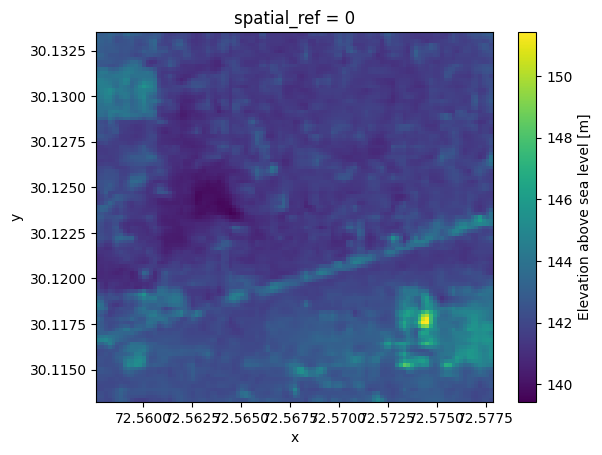

In [19]:
ds.z.plot()

(array([11025.,     0.,     0.,  3991., 29084., 22050., 22050.,     0.,
        22050., 11025.]),
 array([97.78016352, 97.85375108, 97.92733864, 98.0009262 , 98.07451376,
        98.14810132, 98.22168888, 98.29527644, 98.368864  , 98.44245156,
        98.51603912]),
 <BarContainer object of 10 artists>)

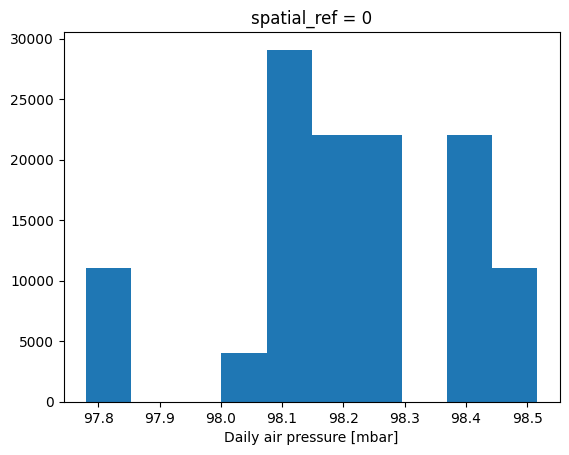

In [21]:
ds.p_air_24.plot()

se_root is ploted by this command with there time.
index starts with 0 in python


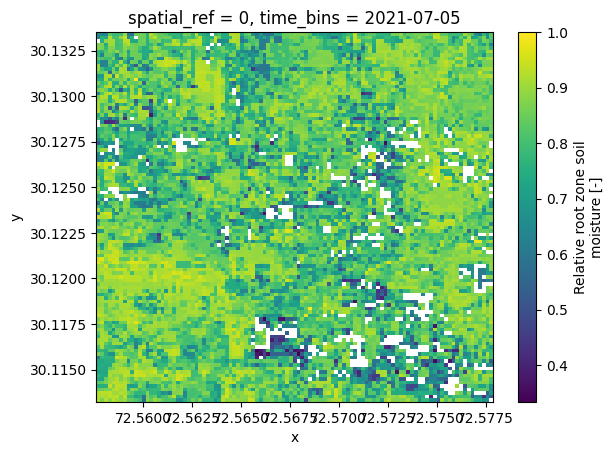

In [20]:
ds.se_root.isel(time_bins = 4).plot()

why i uses et_look command to fetch the se_root?


because by using the command 'pywapor.project.se_root(latlim,lonlim, sources=level)', when it collects data there is some missing data which can't be compute by the availible data in repositary due to any reason but when we use et_lool command it is actually fetching extra data for its computation but when it comes to se_root where there is a missing data it can be covered by the other function which is going to compute evapotranspiration and we will get se_root from there.
